[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\mrkkokku\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


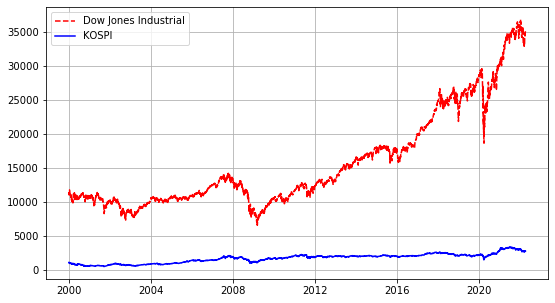

In [1]:
# 국내 주식과 미국 주식의 상관관계를 비교해보자

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

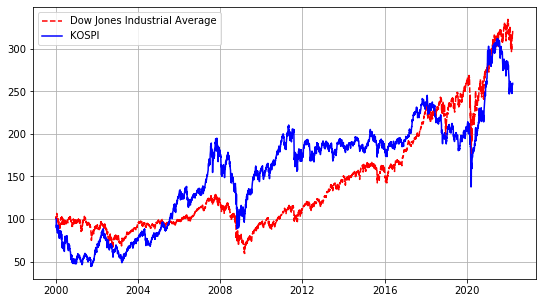

In [2]:
# 위와 같이, 종가 만으로는 둘이 상관관계를 비교하기 어렵다
# 이번엔 현재 종가를 특정 시점의 종가로 나눠서 변동률을 구해보자

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [3]:
# 산점도 Scatter Plot 을 활용해서
# 미국시장과 국내시장의 상관관계를 알아보자
# x: dow, y: KOSPI

print(len(dow)); print(len(kospi))

5597
5485


In [4]:
# 아래와 같이하면 x, y 크기를 맞추라고 나온다
# plt.scatter(dow, kospi, marker='.')

# 데이터 길이 맞추는 작업을 해보자
import pandas as pd

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
print(df)

                     DOW        KOSPI
Date                                 
2000-01-03  11357.509766          NaN
2000-01-04  10997.929688  1059.040039
2000-01-05  11122.650391   986.309998
2000-01-06  11253.259766   960.789978
2000-01-07  11522.559570   948.650024
...                  ...          ...
2022-03-24  34707.941406  2729.659912
2022-03-25  34861.238281  2729.979980
2022-03-28  34955.890625  2729.560059
2022-03-29  35294.191406  2741.070068
2022-03-30  35308.441406  2746.739990

[5767 rows x 2 columns]


In [5]:
# 위에서 NaN 값들로인해 길이가 맞지 않아지는 걸 확인할 수 있고
# 저것들에 대한 처리를 해보자

# 아래와 같이 fillna함수에, bfill 방식을 택하면 backwar의 의미
# ffill 하면 forward의 의미로
# NaN를 채울 때 뒷값을 땡겨 채우면 bfill
# NaN를 채울 때 앞값을 떙겨 채우면 ffill

# 고로, 두번 해주면 모든 값 다 채워질 것임

# 무엇을 택하느냐, 순서적인면이라던가 하는 부분은 
# 쓸 때 마다 적절히 선택해야한다.

df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
print(df)
print(len(dow))
print(len(kospi))

                     DOW        KOSPI
Date                                 
2000-01-03  11357.509766  1059.040039
2000-01-04  10997.929688  1059.040039
2000-01-05  11122.650391   986.309998
2000-01-06  11253.259766   960.789978
2000-01-07  11522.559570   948.650024
...                  ...          ...
2022-03-24  34707.941406  2729.659912
2022-03-25  34861.238281  2729.979980
2022-03-28  34955.890625  2729.560059
2022-03-29  35294.191406  2741.070068
2022-03-30  35308.441406  2746.739990

[5767 rows x 2 columns]
5597
5485


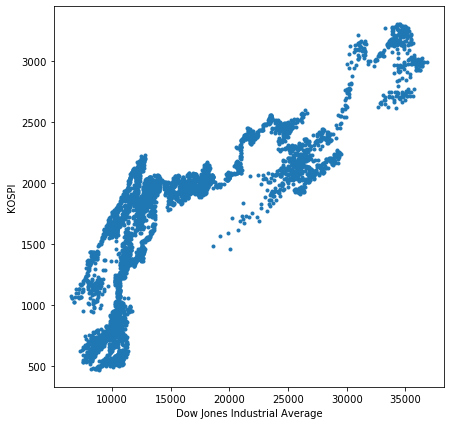

In [6]:
# 이제 데이터 처리가 완료되었으니 산점도를 그려보자

# y=x 그래프의 모양일때가 상관계수가 1인것인데
# 이것만으론 판단이 애매한 결과가 나온다

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [7]:
# scipy 패키지의 서브패키지인 stats는 다양한 통계함수를 제공한다
# inregress() 함수를 이용하면 시리즈 객체 두개만으로 간단히
# 선현 회귀 모델을 생성해 볼 수 있다

from scipy import stats

# model = stats.linregress( 독립변수, 종속변수 )

regr = model = stats.linregress(df['DOW'], df['KOSPI'])

print(regr)

LinregressResult(slope=0.07588472548981745, intercept=470.97135513236503, rvalue=0.8230156050391763, pvalue=0.0, stderr=0.0006897779744149855)


In [8]:
# 상관계수를 아래와 같이 쉽게 구해 볼 수 있다

# DOW와 KOSPI의 상관계수가 0.822615임을 확인

df.corr()

,DOW,KOSPI
DOW,1.000000,0.823016
KOSPI,0.823016,1.000000


In [9]:
# Series로도 구해볼 수 있다

df['DOW'].corr(df['KOSPI'])

0.8230156050391761

In [10]:
# 결정계수. (r-squred)
# 상관관계를 제곱한 값으로, 관측된 데이터에서 추정한 회귀선이 실제로
# 데이터를 어느정도 설명하는지를 나타내는 계수

r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2

r_squared

# 이 계수가 1이면 모든 표본 관측치가 추정된 회귀선 상에만 있다는 의미
# 즉, 추정된 회귀선이 변수 간의 관계를 완벽히 설명한다
# 반면 결정계수가 0이면 추정된 회귀선이 변수 사이의 관계를 
# 전혀 설명하지 못한다는 뜻

0.6773546861380012